In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("data/fair_value_bananas.csv", sep=";")

In [21]:
df.groupby('product').agg({'mid_price': ['mean', 'std', 'min', 'max']})

mid_price                           
              mean       std     min      max
product                                      
BANANAS  4938.2895  7.958996  4924.5   4956.0
PEARLS   9999.9935  1.493427  9996.5  10003.5

## Calulating Current price by prosperity

Formula for current price at time 't' = (profit[t] + Amount invested)/ position[t]

### Calulating the Current price for Banana
 - Buy 7 shells at timestamp 100( by observing log file) and no trade afterwards

In [49]:
df.head(5)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,-1,0,BANANAS,4946,1,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,0.0
2,-1,100,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,-1,100,BANANAS,4945,31,NaN,NaN,NaN,NaN,4950,7,4952.0,31.0,NaN,NaN,4947.5,0.0
4,-1,200,BANANAS,4945,22,NaN,NaN,NaN,NaN,4951,1,4952.0,21.0,NaN,NaN,4948.0,0.0


In [23]:
df.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
3995,-1,199700,PEARLS,10002,1,9996.0,2.0,9995.0,28.0,10004,2,10005.0,28.0,NaN,NaN,10003.0,0.00000
3996,-1,199800,BANANAS,4931,1,4930.0,27.0,NaN,NaN,4937,28,NaN,NaN,NaN,NaN,4934.0,-112.53125
3997,-1,199800,PEARLS,9996,1,9995.0,27.0,NaN,NaN,10004,1,10005.0,27.0,NaN,NaN,10000.0,0.00000
3998,-1,199900,BANANAS,4931,9,4930.0,25.0,NaN,NaN,4932,3,4937.0,25.0,NaN,NaN,4931.5,-112.41797
3999,-1,199900,PEARLS,9998,9,9995.0,25.0,NaN,NaN,10005,25,NaN,NaN,NaN,NaN,10001.5,0.00000


In [24]:
df_banana = df[df["product"] == "BANANAS"].set_index("timestamp")
df_banana.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,BANANAS,4946,1,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,0.000000
100,-1,BANANAS,4945,31,NaN,NaN,NaN,NaN,4950,7,4952.0,31.0,NaN,NaN,4947.5,0.000000
200,-1,BANANAS,4945,22,NaN,NaN,NaN,NaN,4951,1,4952.0,21.0,NaN,NaN,4948.0,-12.566406
300,-1,BANANAS,4945,25,NaN,NaN,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4948.5,-11.226562
400,-1,BANANAS,4946,5,4945.0,25.0,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4949.0,-9.363281


In [25]:
df_banana.shape

(2000, 16)

In [29]:
df_banana["Curr_price"] = (df_banana.loc[100, "ask_price_1"]*7 + df_banana["profit_and_loss"])/7
df_banana.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,Curr_price
timestamp,,,,,,,,,,,,,,,,,
0,-1,BANANAS,4946,1,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,0.000000,4950.000000
100,-1,BANANAS,4945,31,NaN,NaN,NaN,NaN,4950,7,4952.0,31.0,NaN,NaN,4947.5,0.000000,4950.000000
200,-1,BANANAS,4945,22,NaN,NaN,NaN,NaN,4951,1,4952.0,21.0,NaN,NaN,4948.0,-12.566406,4948.204799
300,-1,BANANAS,4945,25,NaN,NaN,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4948.5,-11.226562,4948.396205
400,-1,BANANAS,4946,5,4945.0,25.0,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4949.0,-9.363281,4948.662388


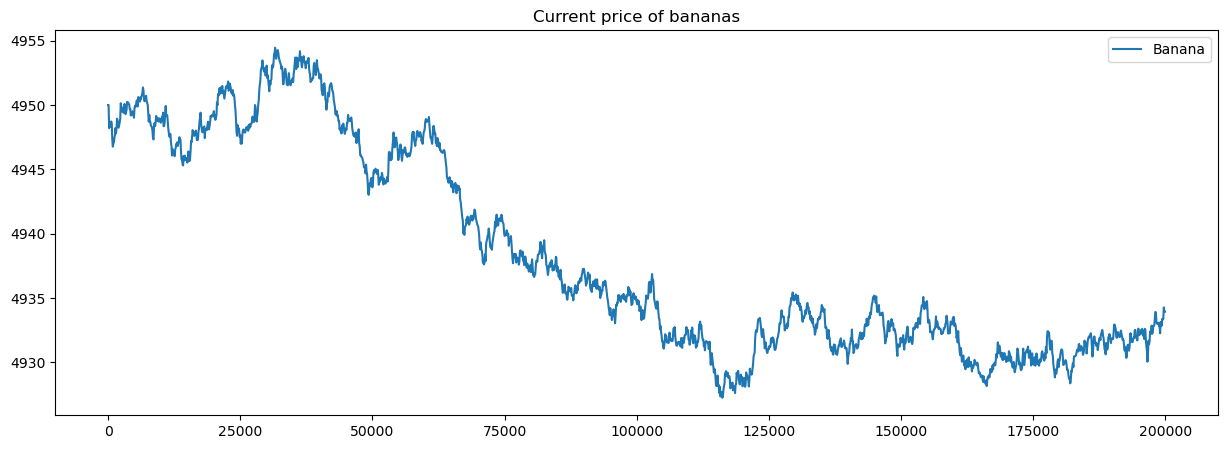

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(df_banana.index, df_banana["Curr_price"])
plt.title("Current price of bananas")
plt.legend(["Banana"])
plt.show()

### Calulating the Current price for Pearls
 - Buy 6 shells at timestamp 100( by observing log file) and no trade afterwards

In [32]:
df = pd.read_csv("data/fair_value_pearls.csv", sep=";")

In [34]:
df_pearls = df[df["product"] == "PEARLS"].set_index("timestamp")
df_pearls.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
100,-1,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
200,-1,PEARLS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,-12.0
300,-1,PEARLS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,-12.0
400,-1,PEARLS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,-12.0


In [35]:
df_pearls.shape

(2000, 16)

In [36]:
df_pearls["Curr_price"] = (df_pearls.loc[100, "ask_price_1"]*6 + df_pearls["profit_and_loss"])/6
df_pearls.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,Curr_price
timestamp,,,,,,,,,,,,,,,,,
0,-1,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0,10002.0
100,-1,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0,10002.0
200,-1,PEARLS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,-12.0,10000.0
300,-1,PEARLS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,-12.0,10000.0
400,-1,PEARLS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,-12.0,10000.0


In [40]:
df_pearls.tail()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,Curr_price
timestamp,,,,,,,,,,,,,,,,,
199500,-1,PEARLS,9996,1,9995.0,21.0,NaN,NaN,9998,2,10004.0,1.0,10005.0,21.0,9997.0,-12.0,10000.0
199600,-1,PEARLS,9995,28,NaN,NaN,NaN,NaN,10005,28,NaN,NaN,NaN,NaN,10000.0,-12.0,10000.0
199700,-1,PEARLS,10002,1,9996.0,2.0,9995.0,28.0,10004,2,10005.0,28.0,NaN,NaN,10003.0,-12.0,10000.0
199800,-1,PEARLS,9996,1,9995.0,27.0,NaN,NaN,10004,1,10005.0,27.0,NaN,NaN,10000.0,-12.0,10000.0
199900,-1,PEARLS,9998,9,9995.0,25.0,NaN,NaN,10005,25,NaN,NaN,NaN,NaN,10001.5,-12.0,10000.0


In [46]:
df_pearls.agg({"Curr_price":["min", "max", "mean", "median", "std"]})

,Curr_price
min,10000.00000
max,10002.00000
mean,10000.00200
median,10000.00000
std,0.06323


In [43]:
df_pearls.Curr_price.value_counts()

10000.0    1998
10002.0       2
Name: Curr_price, dtype: int64

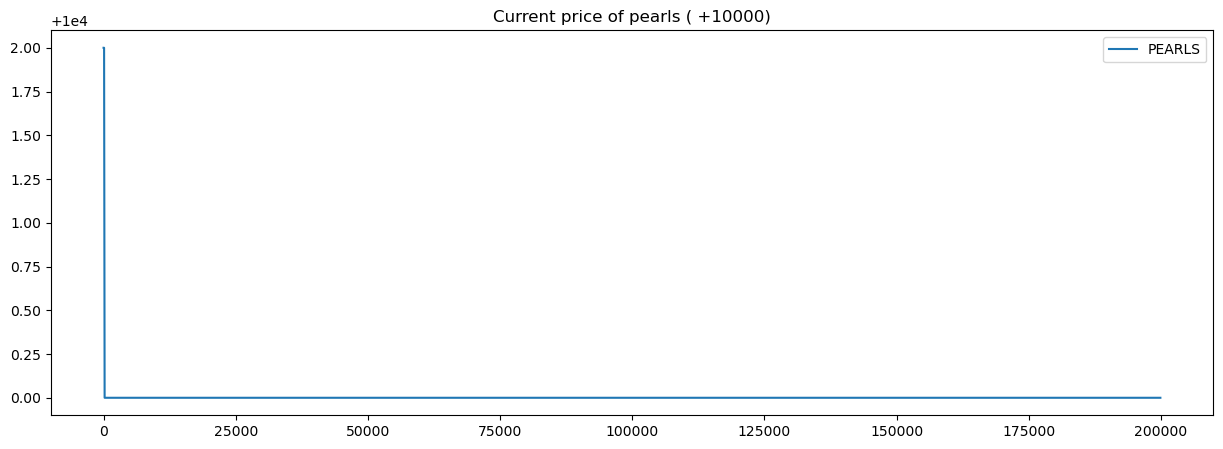

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(df_pearls.index, df_pearls["Curr_price"])
plt.title("Current price of pearls ( +10000)")
plt.legend(["PEARLS"])
plt.show()

### Code for the above results

In [ ]:

from typing import Dict, List
from datamodel import OrderDepth, TradingState, Order
import math, numpy as np


class Trader:
    storage = {}
    counter : int = 0
    buy = []
    sell = []
    def run(self, state: TradingState) -> Dict[str, List[Order]]:
        """
        Only method required. It takes all buy and sell orders for all symbols as an input,
        and outputs a list of orders to be sent
        """
        # Initialize the method output dict as an empty dict
        result = {}

        # Iterate over all the keys (the available products) contained in the order depths
        for product in state.order_depths.keys():
          if product == "BANANAS":
        #   if product == "PEALRS":
            # Run for all products

            # Retrieve the Order Depth containing all the market BUY and SELL orders for PEARLS
            order_depth: OrderDepth = state.order_depths[product]

            # Initialize the list of Orders to be sent as an empty list
            orders: list[Order] = []

            # Define a fair value for the products.
            own_trades = state.own_trades
                
            # Optional ------------------------------ 
            # print("state = ", state)
            # Buying 
            best_ask = min(order_depth.sell_orders.keys())
            best_ask_volume = order_depth.sell_orders[best_ask]

            if len(order_depth.sell_orders) > 0 and state.timestamp < 200:
                print("BUY", str(-best_ask_volume) + "x", best_ask)
                orders.append(Order(product, best_ask, -best_ask_volume))

               
            # Storing orders 
            
            print("state.own_trades = ", state.own_trades)
            print("state.position = ", state.position)
            print("Orders = ", orders)
            result[product] = orders

        return result